In [1]:
# ============================================================================
# ANFIS Regression Example: Nonlinear Function Approximation
# ============================================================================
# Function: y = 2*sin(2πx) + 1.5*cos(4πx) + 0.5*x + noise
# ============================================================================

import sys
import os

# Adiciona o diretório correto ao path
# Ajuste o caminho conforme sua estrutura real
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))
print(f"✅ Diretório atual adicionado ao path: {os.getcwd()}")

from fuzzy_systems.learning.anfis import ANFIS


import numpy as np
import matplotlib.pyplot as plt

# Configurar matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

print("✅ Bibliotecas importadas com sucesso!")
print(f"   Versão do NumPy: {np.__version__}")


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd


✅ Diretório atual adicionado ao path: /Users/1moi6/Desktop/Minicurso Fuzzy/fuzzy_systems/notebooks_colab/03_learning
✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!
   Versão do NumPy: 2.2.6


In [2]:
np.random.seed(42)

# 1. Generate synthetic data
# ============================================================================
def target_function(x):
    """
    Nonlinear function combining sine, cosine and linear terms.
    y = 2*sin(2πx) + 1.5*cos(4πx) + 0.5*x
    """
    return 2 * np.sin(2 * np.pi * x) + 1.5 * np.cos(4 * np.pi * x) + 0.5 * x

# Training data
n_train = 200
X_train = np.random.uniform(0, 2, n_train).reshape(-1, 1)
y_train = target_function(X_train.ravel()) + np.random.normal(0, 0.1, n_train)

# Test data (evenly spaced for smooth curve)
n_test = 50
X_test = np.linspace(0, 2, n_test).reshape(-1, 1)
y_test = target_function(X_test.ravel())

# Validation data
n_val = 50
X_val = np.random.uniform(0, 2, n_val).reshape(-1, 1)
y_val = target_function(X_val.ravel()) + np.random.normal(0, 0.1, n_val)

print("Data shapes:")
print(f"  Training:   X={X_train.shape}, y={y_train.shape}")
print(f"  Validation: X={X_val.shape}, y={y_val.shape}")
print(f"  Test:       X={X_test.shape}, y={y_test.shape}")
print()




Data shapes:
  Training:   X=(200, 1), y=(200,)
  Validation: X=(50, 1), y=(50,)
  Test:       X=(50, 1), y=(50,)



In [3]:
# 2. Create and configure ANFIS model
# ============================================================================
anfis = ANFIS(
    n_inputs=1,                    # Single input variable
    n_mfs=7,                     # 5 membership functions
    mf_type='gaussmf',             # Gaussian membership functions
    learning_rate=0.001,                       # Learning rate
    lambda_l1=0.0,               # L1 regularization (Lasso)
    lambda_l2=0.001,               # L2 regularization (Ridge)
    batch_size=128,                 # Mini-batch training
    use_adaptive_lr=True,          # Adaptive learning rate (Lyapunov)
    classification=False,           # Regression task
    
)



In [4]:
# 3. Train the model
# ============================================================================
print("\nTraining ANFIS model...")
print("="*70)

anfis.fit(
    X_train, y_train,
    epochs=500,
    verbose=True,
    train_premises=True,           # Train MF parameters
    X_val=X_val,
    y_val=y_val,
    early_stopping_patience=200
)




Training ANFIS model...
                           ANFIS - Training                           
 Inputs: 1
 Num MFs: [7]
 Rules: 7
 MF Type: gaussmf
 Type: Minibatch
 Samples: 200
 Batch size: 128
 Batches/epoch: 2
 Type: Ridge (L2)
 L1: 0.0
 L2: 0.001
Epoch   1/500 - Train RMSE: 0.143568, Val RMSE: 0.165638, Cost: 0.020749
Epoch  10/500 - Train RMSE: 0.134513, Val RMSE: 0.159547, Cost: 0.018231
Epoch  20/500 - Train RMSE: 0.140629, Val RMSE: 0.177308, Cost: 0.019914
Epoch  30/500 - Train RMSE: 0.137657, Val RMSE: 0.150694, Cost: 0.019088
Epoch  40/500 - Train RMSE: 0.140673, Val RMSE: 0.194514, Cost: 0.019927
Epoch  50/500 - Train RMSE: 0.132401, Val RMSE: 0.165070, Cost: 0.017669
Epoch  60/500 - Train RMSE: 0.135997, Val RMSE: 0.168125, Cost: 0.018634
Epoch  70/500 - Train RMSE: 0.132949, Val RMSE: 0.164345, Cost: 0.017815
Epoch  80/500 - Train RMSE: 0.143730, Val RMSE: 0.144703, Cost: 0.020797
Epoch  90/500 - Train RMSE: 0.152040, Val RMSE: 0.180305, Cost: 0.023255
Epoch 100/500 - T

In [5]:
# 4. Evaluate the model
# ============================================================================
print("\nModel Evaluation:")
print("="*70)

# Predictions
y_pred_train = anfis.predict(X_train)
y_pred_test = anfis.predict(X_test)
y_pred_val = anfis.predict(X_val)

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

print(f"Training Set:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")
print()
print(f"Validation Set:")
print(f"  RMSE: {val_rmse:.4f}")
print(f"  MAE:  {val_mae:.4f}")
print(f"  R²:   {val_r2:.4f}")
print()
print(f"Test Set:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("="*70)





Model Evaluation:
Training Set:
  RMSE: 0.1143
  MAE:  0.0886
  R²:   0.9954

Validation Set:
  RMSE: 0.1347
  MAE:  0.1102
  R²:   0.9923

Test Set:
  RMSE: 0.0835
  MAE:  0.0597
  R²:   0.9976


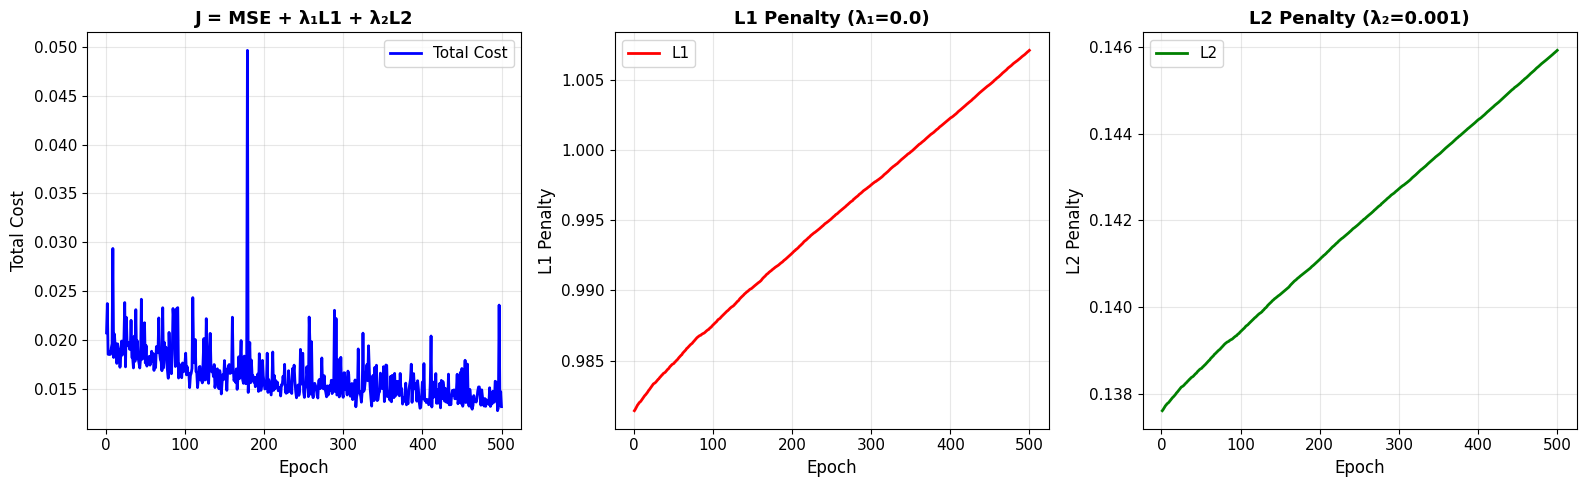

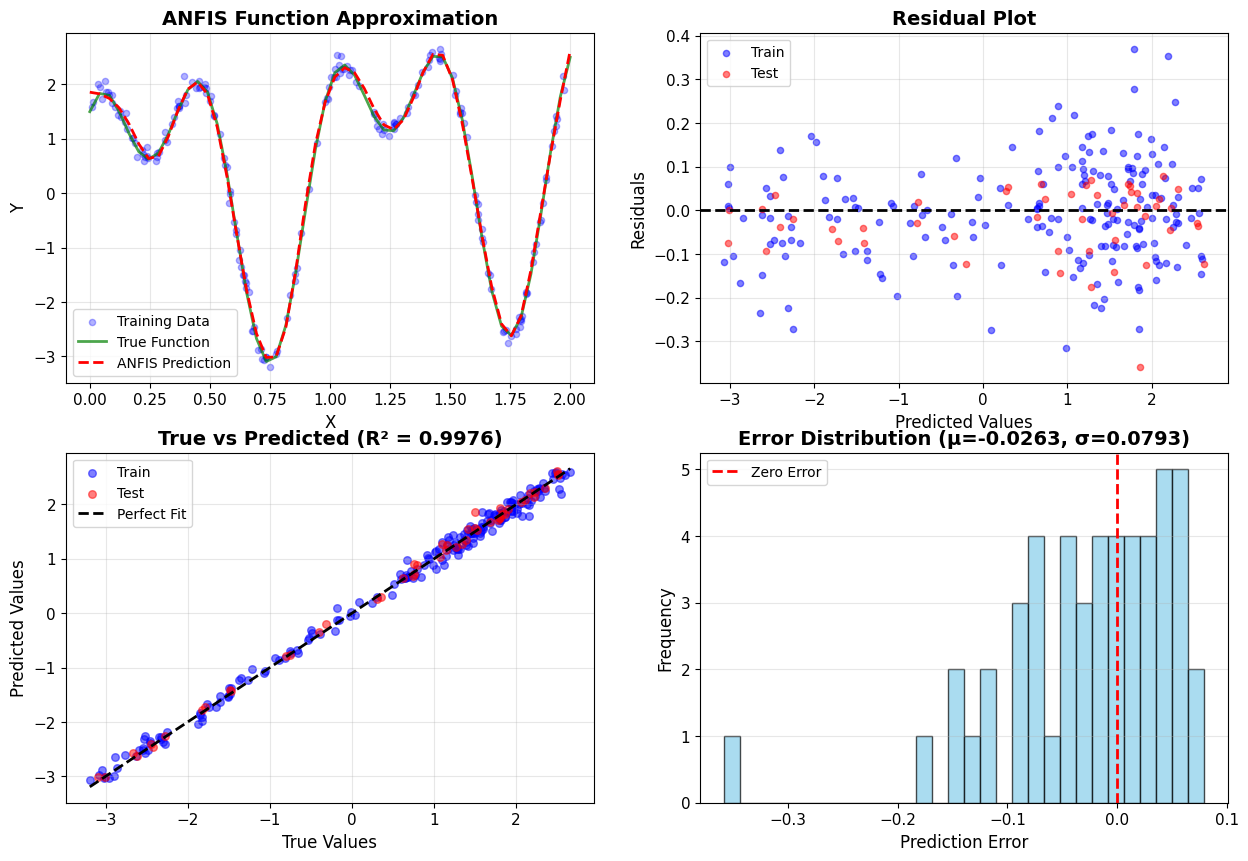

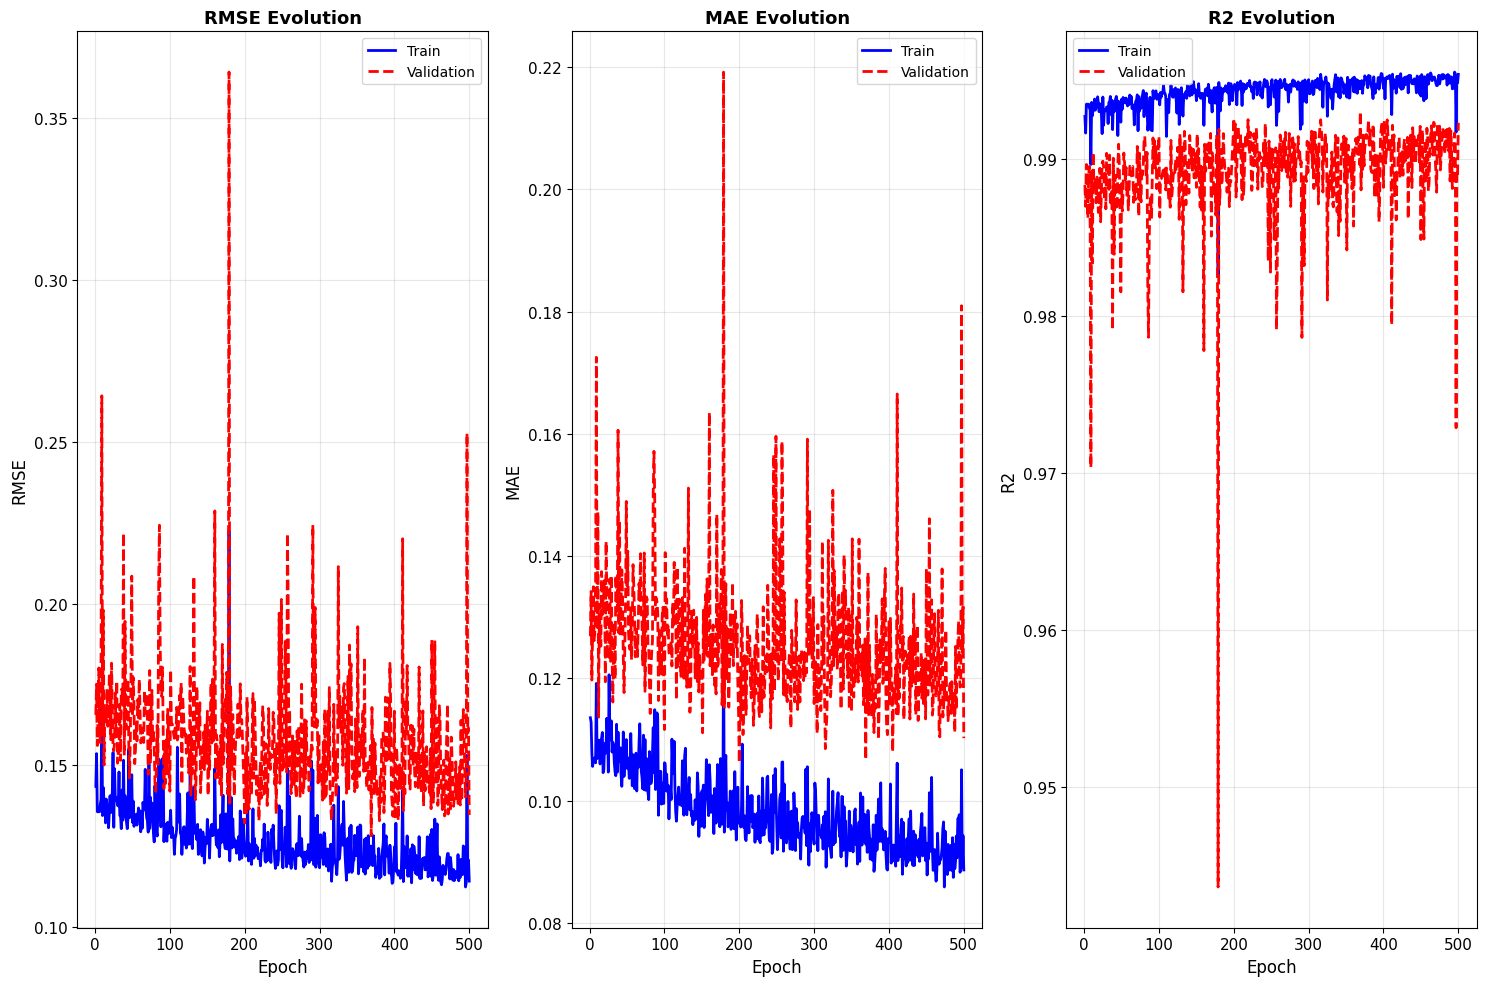

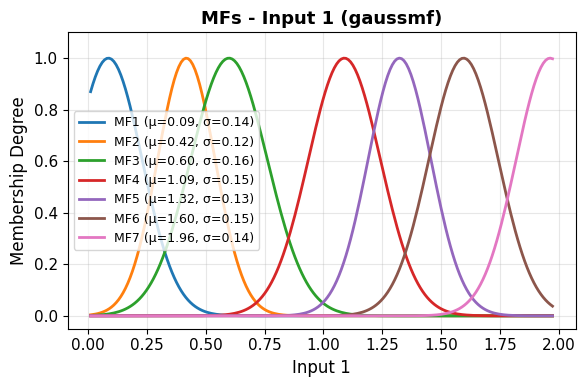

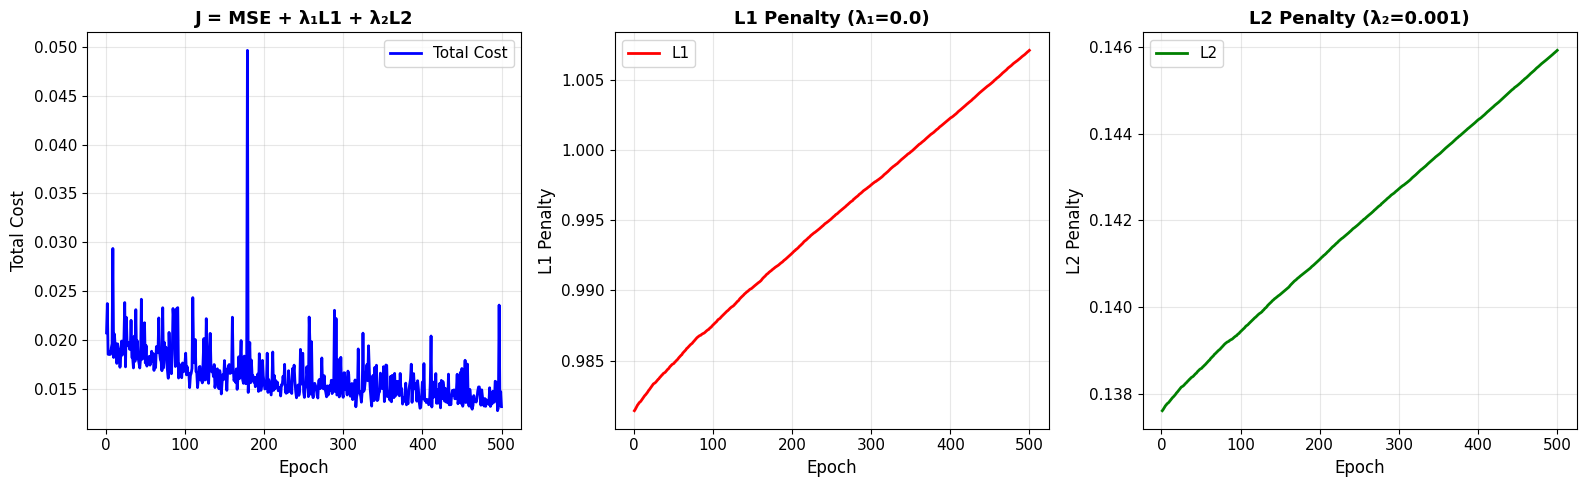

In [6]:
# 5. Visualizations
# ============================================================================

# 5.1 Function Approximation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Predictions vs True Function
ax = axes[0, 0]
ax.scatter(X_train, y_train, alpha=0.3, s=20, label='Training Data', color='blue')
ax.plot(X_test, y_test, 'g-', linewidth=2, label='True Function', alpha=0.7)
ax.plot(X_test, y_pred_test, 'r--', linewidth=2, label='ANFIS Prediction')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('ANFIS Function Approximation', fontsize=14, weight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Residuals
ax = axes[0, 1]
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test
ax.scatter(y_pred_train, residuals_train, alpha=0.5, s=20, label='Train', color='blue')
ax.scatter(y_pred_test, residuals_test, alpha=0.5, s=20, label='Test', color='red')
ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax.set_title('Residual Plot', fontsize=14, weight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: True vs Predicted
ax = axes[1, 0]
ax.scatter(y_train, y_pred_train, alpha=0.5, s=30, label='Train', color='blue')
ax.scatter(y_test, y_pred_test, alpha=0.5, s=30, label='Test', color='red')
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Perfect Fit')
ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
ax.set_title(f'True vs Predicted (R² = {test_r2:.4f})', fontsize=14, weight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 4: Error Distribution
ax = axes[1, 1]
errors = y_test - y_pred_test
ax.hist(errors, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax.set_xlabel('Prediction Error', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'Error Distribution (μ={np.mean(errors):.4f}, σ={np.std(errors):.4f})', 
            fontsize=14, weight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')


# 5.2 Training Metrics Evolution
anfis.plot_metrics(['rmse', 'mae', 'r2'])

# 5.3 Learned Membership Functions
anfis.plot_membership_functions()

# 5.4 Regularization Evolution
anfis.plot_regularization()


In [9]:
# 6. Extract and display rules
# ============================================================================
print("\nFuzzy Rules:")
print("="*70)
rules_df = anfis.rules_to_dataframe(
    input_names=['X'],
    output_name='Y',
    # linguistic_terms={0: ['Very Low', 'Low', 'Medium', 'High', 'Very High']}
)
rules_df



Fuzzy Rules:


,Rule,X,Y
0,R1,MF1,1.902 +0.543*X
1,R2,MF2,-7.844 +31.801*X
2,R3,MF3,-4.930 +1.091*X
3,R4,MF4,-11.844 +14.819*X
4,R5,MF5,-34.457 +25.246*X
5,R6,MF6,30.157 -19.162*X
6,R7,MF7,-32.650 +17.766*X


In [ ]:
# 6.a Display rules
# ============================================================================
fg = anfis.show_rules_table()

In [ ]:
# 7. Save trained model
# ============================================================================
# anfis.save('anfis_regression_model')
print("Model saved to 'anfis_regression_model.npz'")



In [11]:
# 9. Compare with baseline models
# ============================================================================
print("\nComparison with Baseline Models:")
print("="*70)

# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R²:     {lr_r2:.4f}")

# Polynomial Regression (degree 3)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R²: {poly_r2:.4f}")

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²:         {rf_r2:.4f}")

# ANFIS
print(f"ANFIS R²:                 {test_r2:.4f}  ← Best!")
print("="*70)

print("\n✅ ANFIS Regression Example Complete!")


Comparison with Baseline Models:
Linear Regression R²:     0.0118
Polynomial Regression R²: 0.0425
Random Forest R²:         0.9931
ANFIS R²:                 0.9976  ← Best!

✅ ANFIS Regression Example Complete!
